In [229]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.width', 6000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)

In [220]:
#Anggie Disini

In [341]:
gakinSBY = pd.read_csv('data/data.csv')
gakinSBY['pendidikan_descrip'].value_counts()

gakinSBY.loc[gakinSBY['pendidikan_descrip']=='DIPLOMA IV/STRATA I', 'pendidikan_descrip'] = 'Lebih dari SLTA'
gakinSBY.loc[gakinSBY['pendidikan_descrip']=='AKADEMI/DIPLOMA III/SARJANA MUDA', 'pendidikan_descrip'] = 'Lebih dari SLTA'
gakinSBY.loc[gakinSBY['pendidikan_descrip']=='DIPLOMA I/II', 'pendidikan_descrip'] = 'Lebih dari SLTA'
gakinSBY.loc[gakinSBY['pendidikan_descrip']=='STRATA-II', 'pendidikan_descrip'] = 'Lebih dari SLTA'
gakinSBY.loc[gakinSBY['pendidikan_descrip']=='STRATA-III', 'pendidikan_descrip'] = 'Lebih dari SLTA'
gakinSBY.loc[gakinSBY['pendidikan_descrip']=='Lebih dari SLTA', 'pendidikan_descrip'] = 'LEBIH DARI SLTA'

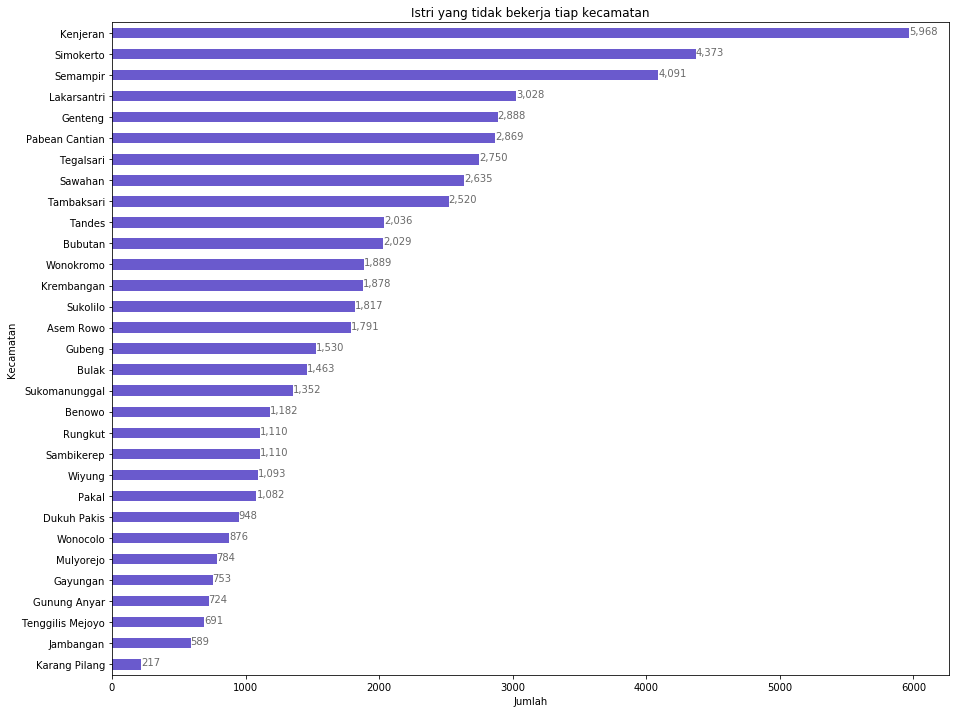

In [335]:
#Insight Muhammad Khotib
#1. Istri yang tidak bekerja tiap kecamatan
is_Istri = gakinSBY.hubkel=='ISTRI'
isTidakKerja = (dfIstriRT['pkrjn_descrip']=='BELUM/TIDAK BEKERJA') | (dfIstriRT['pkrjn_descrip']=='MENGURUS RUMAH TANGGA')
dfIstri = gakinSBY[is_Istri][isTidakKerja]['kecamatan'].value_counts()
plt.figure()

ax = dfIstri.plot(kind='barh', figsize=(15,12),color="slateblue");

plt.title('Istri yang tidak bekerja tiap kecamatan')
plt.xlabel('Jumlah')
plt.ylabel('Kecamatan')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str("{:,}".format(i.get_width())),  color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

c:\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


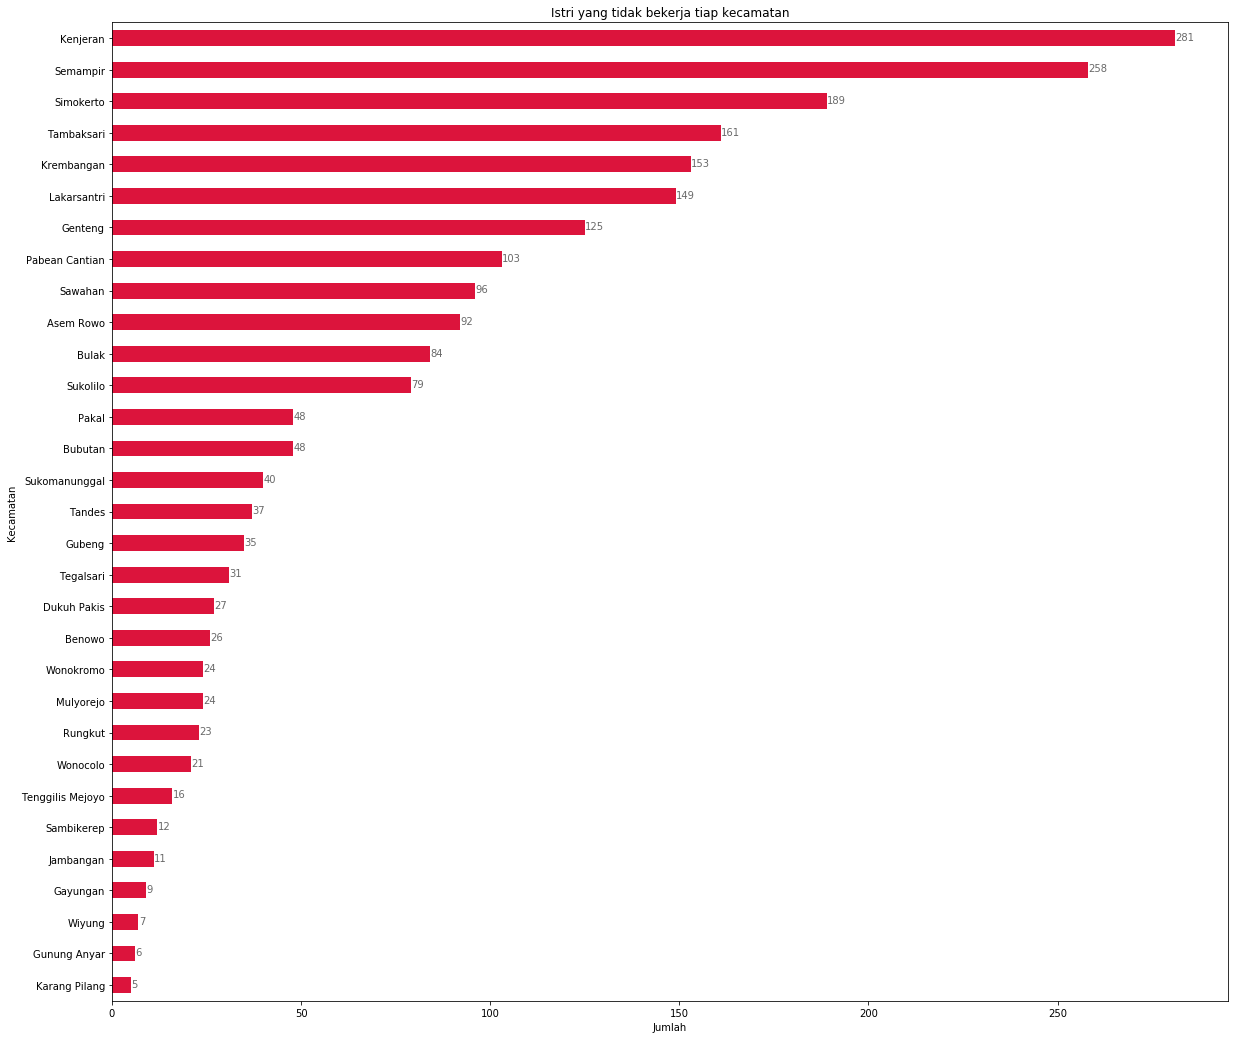

In [319]:
#2. Jumlah warga (bukan anak) yang tidak tamat SD
is_Suami_Istri = (gakinSBY['hubkel'] == 'KEPALA KELUARGA') | (gakinSBY['hubkel'] == 'ISTRI')
is_tidak_tamat_sd = (gakinSBY['pendidikan_descrip'] == 'TIDAK/BLM SEKOLAH') | (gakinSBY['pendidikan_descrip'] == 'BELUM TAMAT SD/SEDERAJAT')
dfDua = gakinSBY[is_Suami_Istri][is_tidak_tamat_sd]['kecamatan'].value_counts()
plt.figure()
ax = dfDua.plot(kind='barh',figsize=(20,18),color="crimson")
ax.set_title("Jumlah warga (bukan anak) yang tidak tamat SD")
ax.set_ylabel("Jumlah");
ax.set_xlabel("Kecamatan");
plt.title('Istri yang tidak bekerja tiap kecamatan')
plt.xlabel('Jumlah')
plt.ylabel('Kecamatan')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str(round((i.get_width()), 2)),  color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()


c:\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


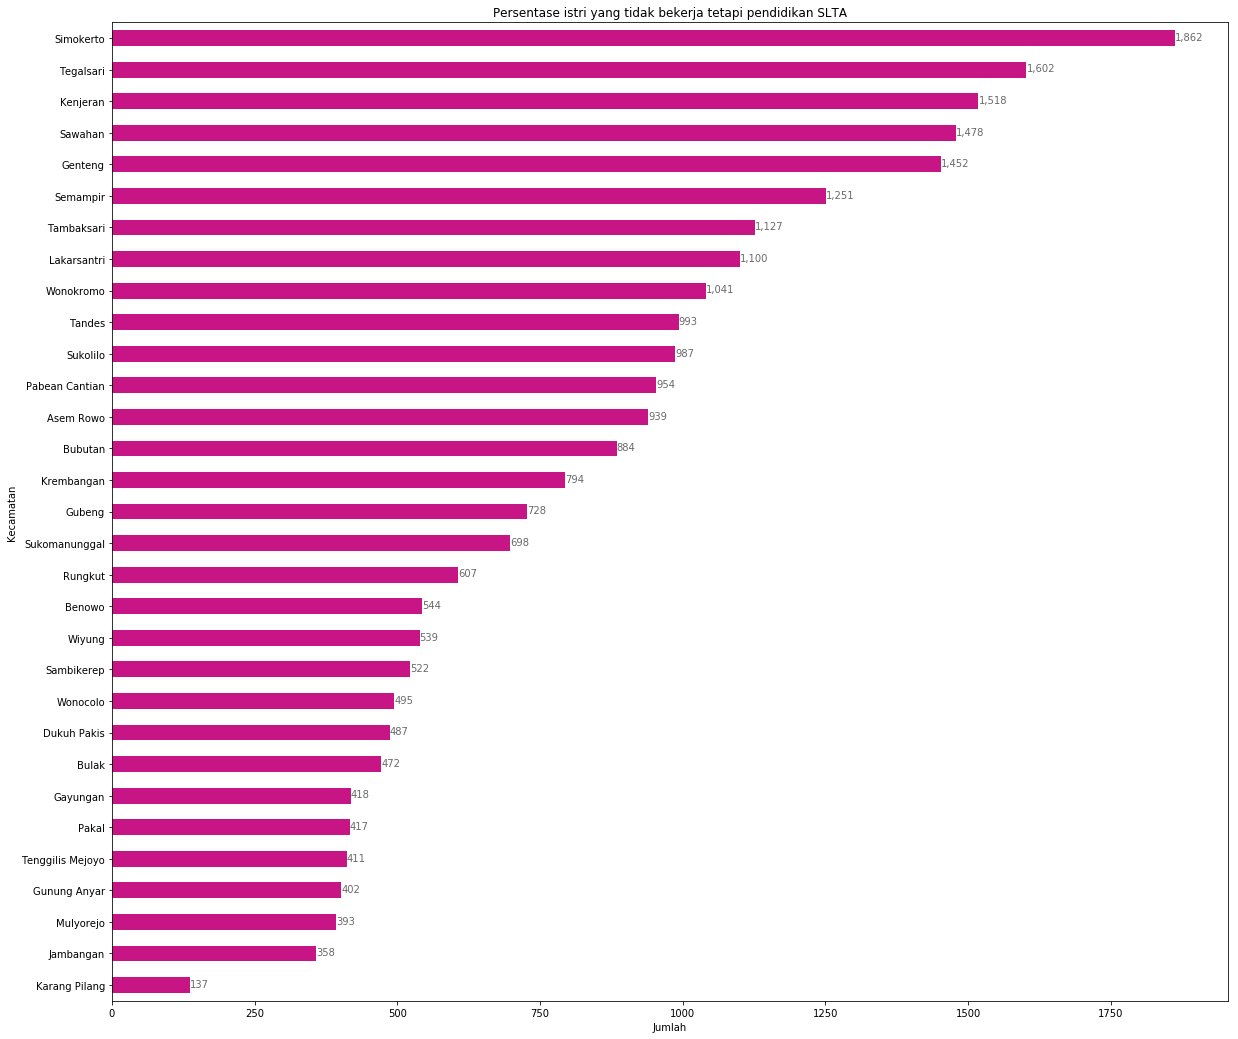

In [334]:
#3. Persentase istri yang tidak bekerja tetapi pendidikan SLTA
is_tidak_slta = gakinSBY['pendidikan_descrip'] == 'SLTA/SEDERAJAT'

ax = gakinSBY[is_Istri][isTidakKerja][is_tidak_slta]['kecamatan'].value_counts().plot(kind='barh',figsize=(20,18),color="mediumvioletred")

ax.set_title('Persentase istri yang tidak bekerja tetapi pendidikan SLTA')
ax.set_xlabel('Jumlah')
ax.set_ylabel('Kecamatan')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str("{:,}".format(i.get_width())),  color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

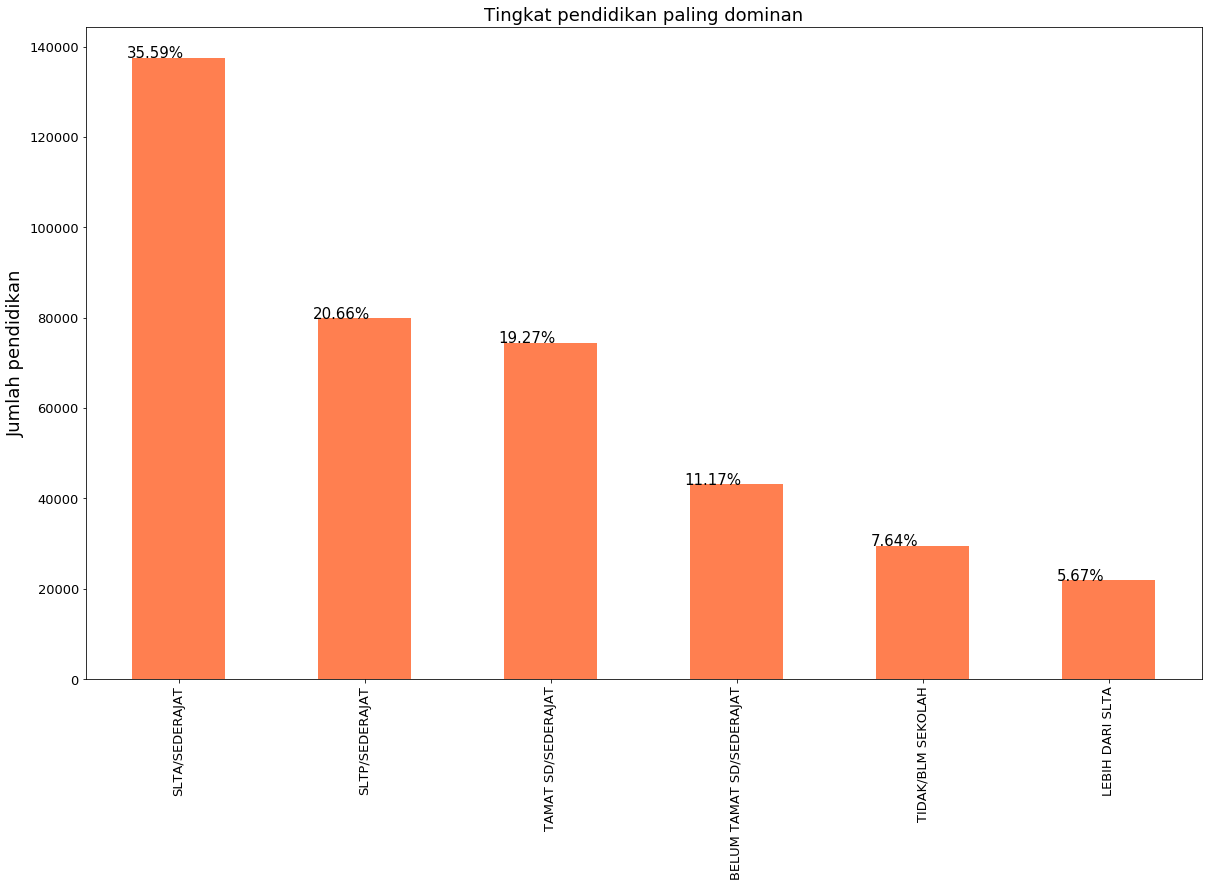

In [342]:
#4. Tingkat pendidikan paling dominan
ax = gakinSBY['pendidikan_descrip'].value_counts().plot(kind='bar', figsize=(20,12),
                                        color="coral", fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Tingkat pendidikan paling dominan", fontsize=18)
ax.set_ylabel("Jumlah pendidikan", fontsize=18);

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()-.03, i.get_height()+.5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='black')


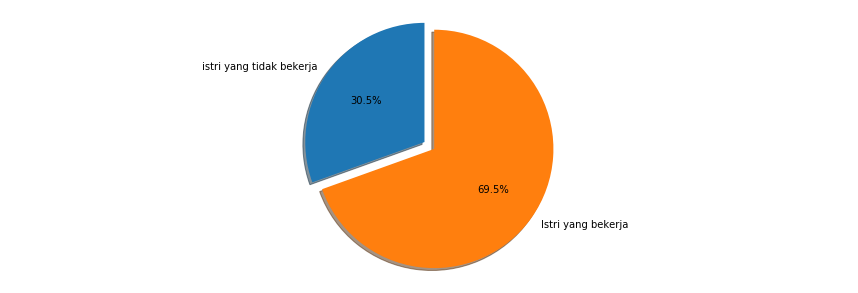

In [117]:
#. Persentase istri yang bekerja
isKerja = ~isTidakKerja
istriKerja = len(gakinSBY[is_Istri][isKerja].index)
istriUnKerja = len(gakinSBY[is_Istri][isTidakKerja].index)

labels = 'istri yang tidak bekerja','Istri yang bekerja'
sizes = [istriKerja, istriUnKerja]
explode = (0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()



<Figure size 1080x360 with 0 Axes>

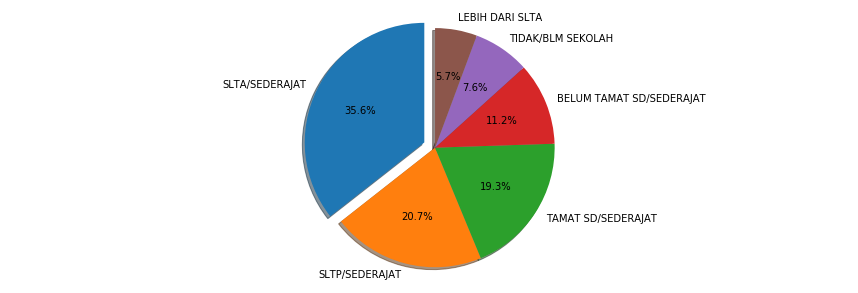

In [299]:
#6. Persentase pendidikan kepala keluarga
isKepalaKeluarga = (gakinSBY['hubkel'] == 'KEPALA KELUARGA')
isS1 = gakinSBY[isKepalaKeluarga]['pendidikan_descrip']=='DIPLOMA IV/STRATA I'

plt.figure()
sizes = gakinSBY['pendidikan_descrip'].value_counts()
explode = (0.1, 0, 0,0,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=sizes.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

c:\python37-32\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


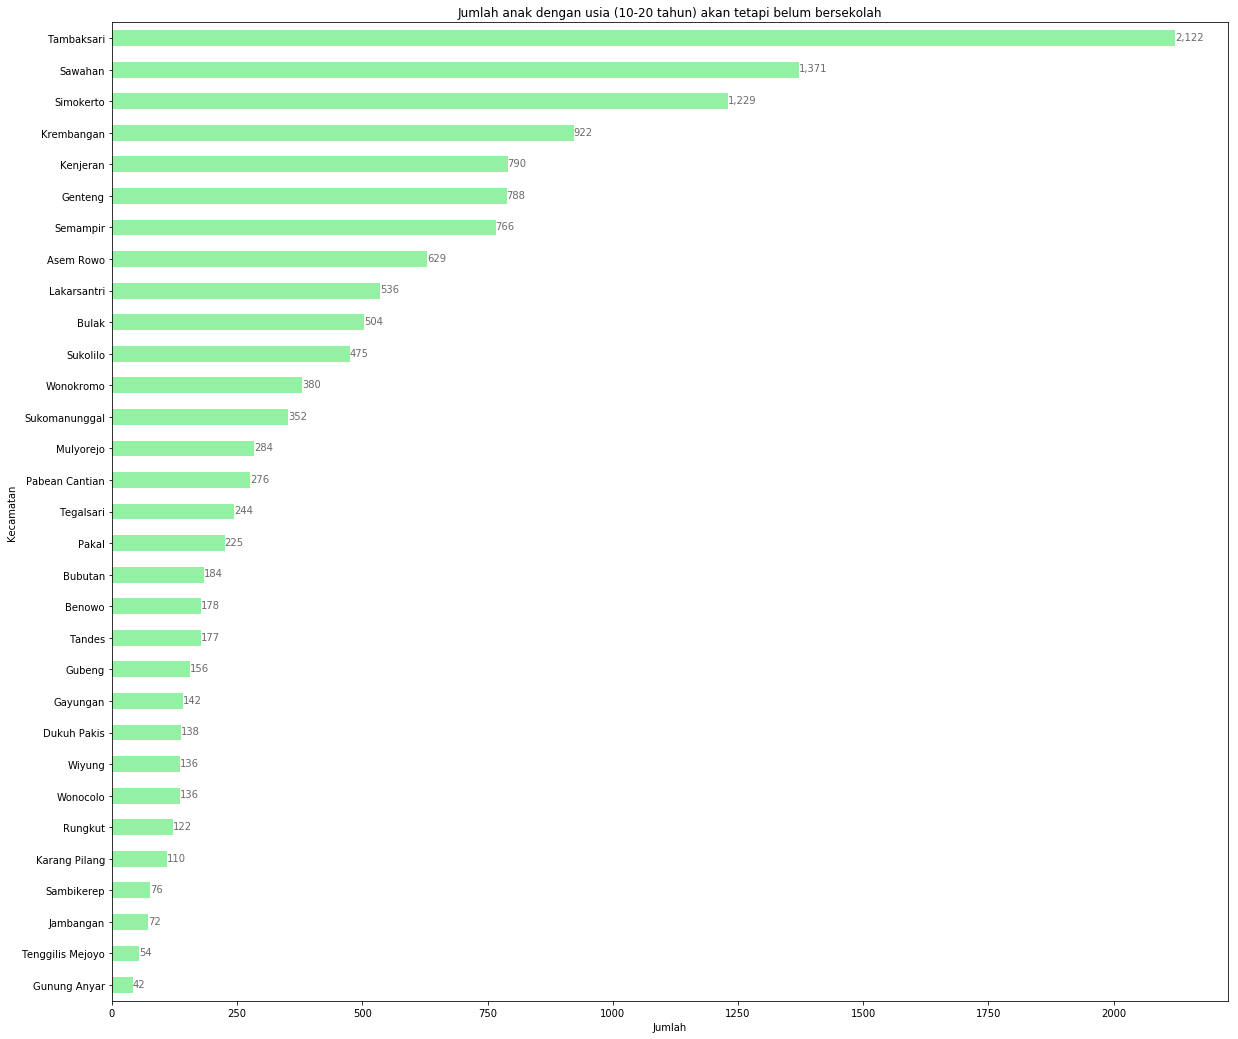

In [345]:
#7. Jumlah anak dengan usia (10-20 tahun) akan tetapi belum bersekolah
thnLahir = gakinSBY['tgl_lhr'].astype(str).str[:4]
#membuat kolom usia
thn = thnLahir.astype(int)
usia = 2019 - thn
gakinSBY['usia'] = usia

isAnak = gakinSBY['hubkel']=='ANAK'
isTidakSekolah = gakinSBY['pendidikan_descrip']=='TIDAK/BLM SEKOLAH'
isWajibSekolah = (gakinSBY['usia']>10) &  (gakinSBY['usia']<20)

ax = gakinSBY[isWajibSekolah][isAnak][isTidakSekolah]['kecamatan'].value_counts().plot(kind='barh', title='Jumlah anak dengan usia (10-20 tahun) akan tetapi belum bersekolah', color=(0.3,0.9,0.4,0.6), figsize=(20,18))

ax.set_xlabel('Jumlah')
ax.set_ylabel('Kecamatan')
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.31, \
            str("{:,}".format(i.get_width())),  color='dimgrey')

# invert for largest on top 
ax.invert_yaxis()

c:\python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


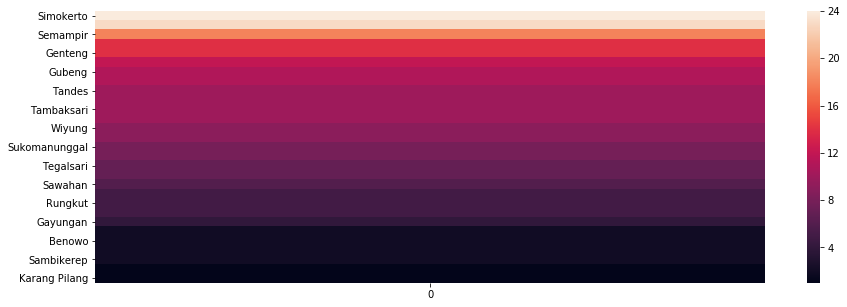

In [355]:
#8. Jumlah istri yang berusia dibawah 20 tahun (Pernikahan dini)
import seaborn as sns
under19 = gakinSBY['usia']<=20
ax = gakinSBY[is_Istri][under19]['kecamatan'].value_counts()#.plot(kind='bar', title='Jumlah pernikahan dini')
df = pd.DataFrame(ax.values, ax.index)
p1 = sns.heatmap(df)

c:\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


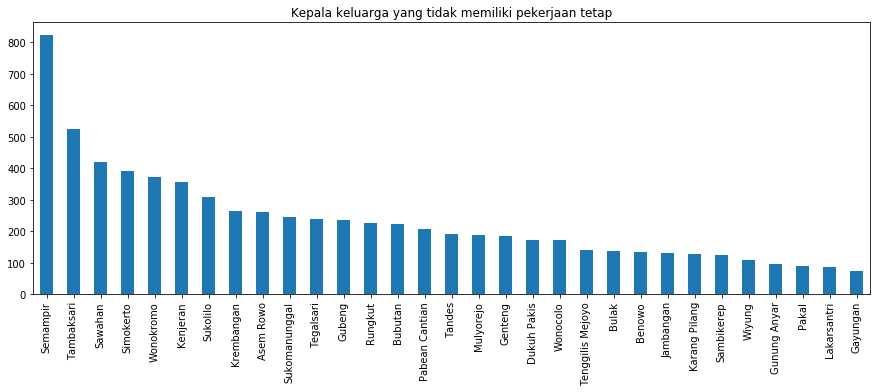

In [210]:
#9. Jumlah kepala keluarga yang tidak memiliki pekerjaan tetap (ex : Buruh Harian lepas, Karyawan honorer)
isTidakTetap = (gakinSBY['pkrjn_descrip']=='BURUH HARIAN LEPAS') | (gakinSBY['pkrjn_descrip']=='KARYAWAN HONORER')| (gakinSBY['pkrjn_descrip']=='TUKANG SOL SEPATU') | (gakinSBY['pkrjn_descrip']=='WIRASWASTA') | (gakinSBY['pkrjn_descrip']=='PEDAGANG') | (gakinSBY['pkrjn_descrip']=='PETANI/PEKEBUN') | (gakinSBY['pkrjn_descrip']=='TUKANG LAS/PANDAI BESI') | (gakinSBY['pkrjn_descrip']=='BURUH NELAYAN/PERIKANAN')| (gakinSBY['pkrjn_descrip']=='USTADZ/MUBALIGH')| (gakinSBY['pkrjn_descrip']=='TUKANG JAHIT') 
gakinSBY[isKepalaKeluarga][isTidakTetap]['kecamatan'].value_counts().plot(kind='bar', title='Kepala keluarga yang tidak memiliki pekerjaan tetap')

c:\python37-32\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


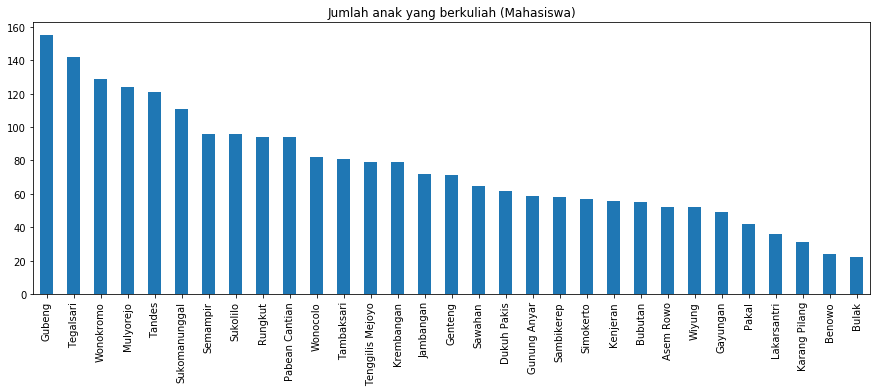

In [215]:
#10. Jumlah anak yang mampu berkuliah (Mahasiswa)
isKuliah = (gakinSBY['pendidikan_descrip'] == 'LEBIH DARI SLTA') & (gakinSBY['pkrjn_descrip'] == 'PELAJAR/MAHASISWA')
gakinSBY[isAnak][isKuliah]['kecamatan'].value_counts().plot(kind='bar', title='Jumlah anak yang berkuliah (Mahasiswa)')

In [ ]:
#Gamal Disini